In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker as mtick
import seaborn as sns

In [2]:
# import datasets
stores = pd.read_csv('superstore_dataset2011-2015.csv',  encoding = 'unicode_escape', engine ='python')

In [3]:
# data head
stores.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [4]:
# data info
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [5]:
# data summary statistics
stores.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [6]:
# columns data types
stores.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [7]:
# dataframe shape
stores.shape

(51290, 24)

In [8]:
# columns with missing data
stores.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [9]:
# rows with duplicated data
stores.duplicated().sum()

0

In [10]:
# make a copy of the data before cleaning
store = stores.copy()

In [11]:
# rename the column names to snake_case without spaces
store.columns = store.columns.str.replace(' ', '_').str.lower()
store.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'postal_code', 'market', 'region', 'product_id', 'category',
       'sub-category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority'],
      dtype='object')

In [12]:
# strings to dates
store['order_date'] = pd.to_datetime(store['order_date'])

store['ship_date'] = pd.to_datetime(store['ship_date'])

C:\Users\panka\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-01-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\panka\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-01-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\panka\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-01-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\panka\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13-01-2014' in DD/MM/YYYY format. Provide format or specif

In [13]:
# create a new column sales_year
store['sales_year'] = pd.DatetimeIndex(store['order_date']).year

In [14]:
# convert categorical columns data type from object to category
cols = ['ship_mode', 'segment', 'state', 'country', 'region', 'market', 'category', 'sub-category', 'order_priority']

store[cols] = store[cols].astype('category')

In [15]:
# confirm changes
store.dtypes

row_id                     int64
order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode               category
customer_id               object
customer_name             object
segment                 category
city                      object
state                   category
country                 category
postal_code              float64
market                  category
region                  category
product_id                object
category                category
sub-category            category
product_name              object
sales                    float64
quantity                   int64
discount                 float64
profit                   float64
shipping_cost            float64
order_priority          category
sales_year                 int64
dtype: object

In [16]:
# Group sales by product categories
category_sales = store.groupby('category')['sales'].sum()


In [17]:
# Calculate weekly and monthly sales totals
weekly_sales = store.resample('W', on='order_date')['sales'].sum()
monthly_sales = store.resample('M', on='order_date')['sales'].sum()

In [18]:
monthly_sales

order_date
2011-01-31    138241.30042
2011-02-28    134969.94086
2011-03-31    171455.59372
2011-04-30    128833.47034
2011-05-31    148146.72092
2011-06-30    189338.43966
2011-07-31    162034.69756
2011-08-31    219223.49524
2011-09-30    255237.89698
2011-10-31    204675.07846
2011-11-30    214934.29386
2011-12-31    292359.96752
2012-01-31    162800.89338
2012-02-29    152661.15144
2012-03-31    201608.72784
2012-04-30    187469.96192
2012-05-31    218960.16042
2012-06-30    249289.77172
2012-07-31    174394.02808
2012-08-31    271669.66086
2012-09-30    256567.85308
2012-10-31    239321.09904
2012-11-30    270723.05356
2012-12-31    291972.33306
2013-01-31    206459.19582
2013-02-28    191062.77216
2013-03-31    230547.79468
2013-04-30    233181.34844
2013-05-31    304509.96336
2013-06-30    341162.34370
2013-07-31    223642.65664
2013-08-31    323876.60716
2013-09-30    326897.27044
2013-10-31    270121.87570
2013-11-30    383039.21248
2013-12-31    371245.40880
2014-01-31    268

In [20]:
# Convert the monthly_sales Series to a DataFrame
monthly_sales_df = monthly_sales.reset_index()
monthly_sales_df

,order_date,sales
0,2011-01-31,138241.30042
1,2011-02-28,134969.94086
2,2011-03-31,171455.59372
3,2011-04-30,128833.47034
4,2011-05-31,148146.72092
5,2011-06-30,189338.43966
6,2011-07-31,162034.69756
7,2011-08-31,219223.49524
8,2011-09-30,255237.89698
9,2011-10-31,204675.07846


In [21]:
# Compute moving averages
store['7-day_moving_avg'] = store['sales'].rolling(window=7).mean()

In [22]:
store.tail(5)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,sales_year,7-day_moving_avg
51285,32593,CA-2014-115427,2014-12-31,2015-04-01,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,...,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium,2014,34.346286
51286,47594,MO-2014-2560,2014-12-31,2015-05-01,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Draâ,...,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium,2014,30.309143
51287,8857,MX-2014-110527,2014-12-31,2015-02-01,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,...,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium,2014,27.009143
51288,6852,MX-2014-114783,2014-12-31,2015-06-01,Standard Class,TD-20995,Tamara Dahlen,Consumer,Juárez,Chihuahua,...,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium,2014,25.066286
51289,36388,CA-2014-156720,2014-12-31,2015-04-01,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,...,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.17,Medium,2014,21.521143


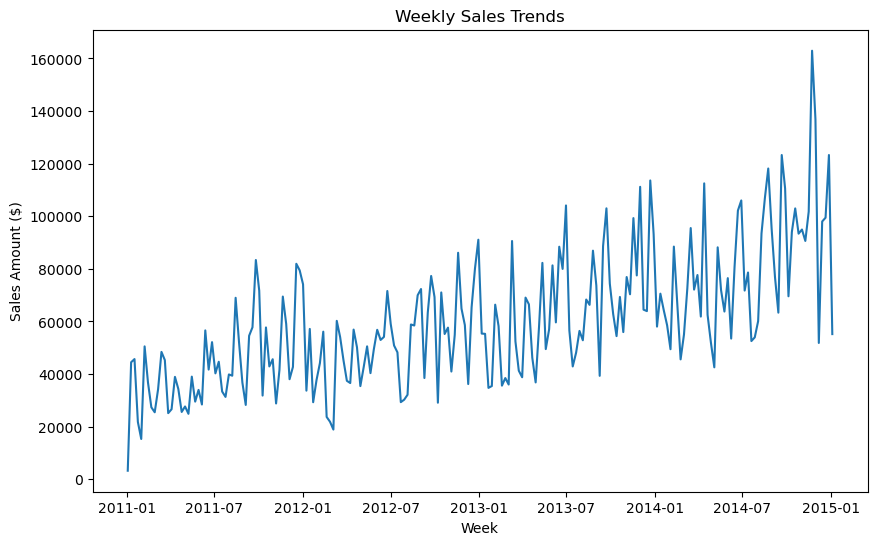

In [23]:
# Line chart for sales trends
plt.figure(figsize=(10, 6))
plt.plot(weekly_sales.index, weekly_sales.values)
plt.title('Weekly Sales Trends')
plt.xlabel('Week')
plt.ylabel('Sales Amount ($)')
plt.show()


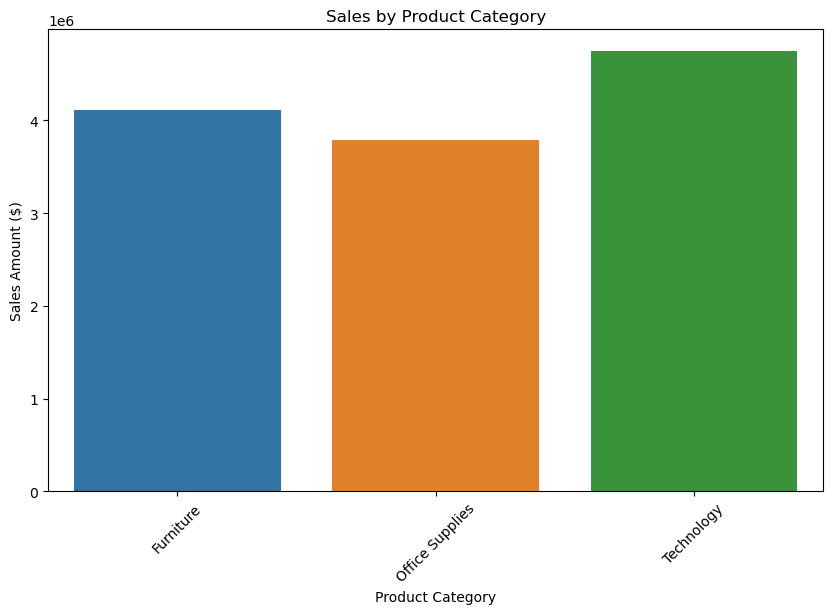

In [24]:
# Bar chart for category sales
plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Sales Amount ($)')
plt.xticks(rotation=45)
plt.show()


In [28]:
# Assuming monthly_sales is a DataFrame with 'order_date' as the index and 'sales' as the column
plt.figure(figsize=(10, 6))
sns.heatmap(monthly_sales, cmap='YlGnBu', annot=True, fmt='.0f', cbar=False)
plt.title('Monthly Sales Seasonality')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


IndexError: Inconsistent shape between the condition and the input (got (48, 1) and (48,))

<Figure size 1000x600 with 0 Axes>